# Pymaceuticals Inc.
---

### Analysis
This report's goal is to provide a summary of some of the key results of an animal study that tested various drug regimens as treatments to 249 mice with squamous cell carcinoma, a skin cancer. Specifically, this report looks to highlight the drug Capomulin versus the other treatment regimes.

Capomulin seemed to show promising results. Among the 10 drugs regimens studied, it averaged the second lowest Tumor volume average at 40.67(mm3), which was just behind Ramicane that averaged	40.21(mm3). For context, the next closest performing drug in this measure was Propriva	that averaged 52.32(mm3) during this case study. To further illustrate Capomulin's effectiveness, a random mouse, w914, was selected and its tumor volume was graphed along its 45 day time period. Here we see its tumor volume started at 45(mm3) before decreasing to about 36(mm3) at the end of the study. These results may suggest that Capomulin can be an effective drug at treating squamous cell carcinoma. 

Another point to mention in favor of Capomulin is its consistency during the testing. It's results produced the second lowest variance in tumor volume and the cast study produced no outliers when its observations were compared on a quartile range. A box and whiskers graph was provided to review this and compared it with the results of 3 other drug regimens.

One cause for concern however is that the study suggests Campomulin grows less effective as the sudject's weight increases. The data implies a strong correlation (r = .84) between a mouse's weight and their tumor's volume when taking Capomulin. Meaning that generally, bigger mice show bigger tumor volumes throughout this test. This may be a reason to try testing various dosages of Capumolin across different size mice to better understand if Capomulin is truly less effective against larger bodies.

 

In [221]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = study_results.merge(mouse_metadata, on="Mouse ID", how= 'left')

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [222]:
# Checking the number of mice.
len(complete_data["Mouse ID"].unique())

249

In [223]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = complete_data.loc[complete_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [224]:
# Optional: Get all the data for the duplicate mouse ID. 

g989_data = complete_data[complete_data["Mouse ID"] == 'g989']	
g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [225]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data.loc[complete_data["Mouse ID"] != 'g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [226]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [227]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean_tumor =  clean_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean().rename(index="Mean Tumor Volume")
median_tumor =  clean_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median().rename(index="Median Tumor Volume")
var_tumor =  clean_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var().rename(index="Tumor Volume Variance")
std_tumor =  clean_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std().rename(index="Tumor Volume Std. Dev.")
sem_tumor =  clean_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem().rename(index="Tumor Volume Std. Err.")

# Assemble the resulting series into a single summary DataFrame.
Stat_summary= pd.DataFrame(mean_tumor).merge(median_tumor, on= "Drug Regimen",
                                      ).merge(var_tumor, on= "Drug Regimen").merge(
                                      std_tumor, on= "Drug Regimen").merge(sem_tumor, on= "Drug Regimen")
Stat_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [228]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

stat_sum = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
stat_sum




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'The observation count of each Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of observed Mouse Timepoints'>

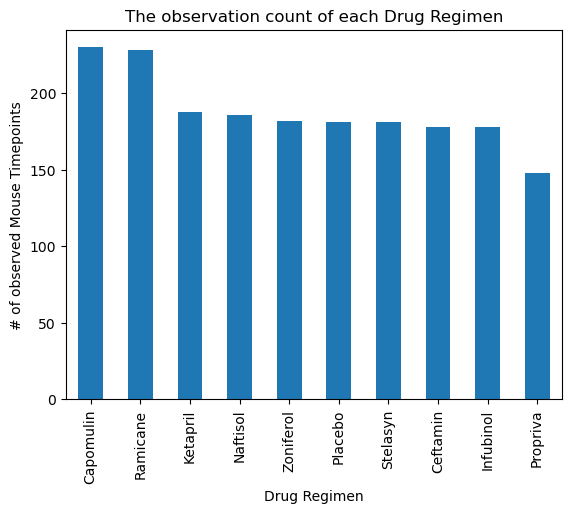

In [229]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

data_to_plot = clean_data.groupby(["Drug Regimen"]).size().rename("# of observed Mouse Timepoints")

#Sorting the data from most observation to least.
data_to_plot = data_to_plot.sort_values(ascending=False)

data_to_plot.plot(kind= "bar", xlabel="Drug Regimen", ylabel= "# of observed Mouse Timepoints", 
                  title= "The observation count of each Drug Regimen", )




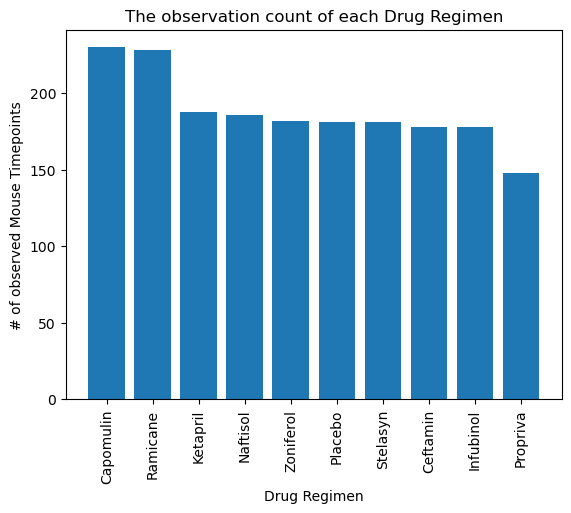

In [230]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = clean_data.groupby(["Drug Regimen"]).size().sort_values(ascending= False)
x_axis = y_axis.index
tick_locations = x_axis
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.title("The observation count of each Drug Regimen")
plt.bar(x_axis, y_axis)
plt.show()


<Axes: ylabel='Sex'>

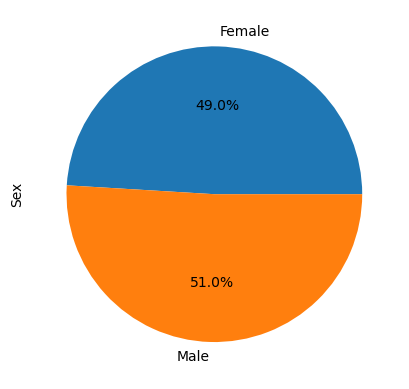

In [231]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_plot = clean_data.groupby(["Sex"]).size().rename("Sex")

pie_plot.plot(kind= "pie",  autopct="%1.1f%%")


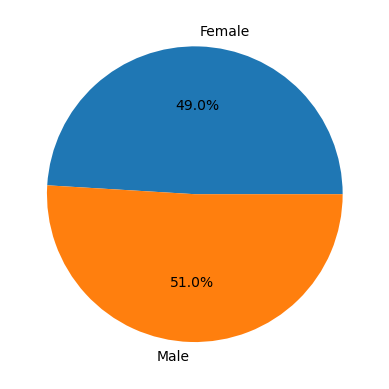

In [232]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
Gender_labels = ["Female", "Male"]

# The values of each section of the pie chart
Gender_counts = clean_data.groupby(["Sex"]).size()

# The colors of each section of the pie chart
colored = ["blue", "orange"]

plt.pie(Gender_counts, labels=Gender_labels, autopct="%1.1f%%",)
plt.show()


## Quartiles, Outliers and Boxplots

In [233]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby(["Mouse ID"])["Timepoint"].max().rename("Final Timepoint")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_clean_data = clean_data.merge(max_timepoint, on= "Mouse ID")


#To preview the data
merged_clean_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [234]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
 # Locate the rows which contain mice on each drug and get the tumor volumes
for regimens in treatments:

    filtered_merge =  merged_clean_data.loc[merged_clean_data["Drug Regimen"] == regimens]
    
            
    # add subset. storing tumor vol data into the created empty list. 
    tumor_volume = filtered_merge.loc[filtered_merge["Timepoint"] == filtered_merge["Final Timepoint"]]["Tumor Volume (mm3)"]
    tumorvol_list.append(tumor_volume)
   
    # Determine outliers using upper and lower bounds

    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    innerq = upperq - lowerq

    print(f"{regimens}'s interquartile range for Tumor Volume (mm3) is: {round(innerq,3)}")
   

    lower_bound = lowerq - (1.5*innerq)
    upper_bound = upperq + (1.5*innerq)

    #Potential outliers
      
    out_of_bounds = filtered_merge[(filtered_merge["Tumor Volume (mm3)"] < lower_bound) | 
                                     (filtered_merge["Tumor Volume (mm3)"] > upper_bound)]

    series_of_outliers = out_of_bounds["Tumor Volume (mm3)"]
    
    #Output provides a series of Tumor Volume (mm3) observations outside of the upper and
    # lower bounds of the Regimen.
    print(f"{regimens}'s potential outliers: {series_of_outliers}")


Capomulin's interquartile range for Tumor Volume (mm3) is: 7.782
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's interquartile range for Tumor Volume (mm3) is: 9.099
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's interquartile range for Tumor Volume (mm3) is: 11.477
Infubinol's potential outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's interquartile range for Tumor Volume (mm3) is: 15.578
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


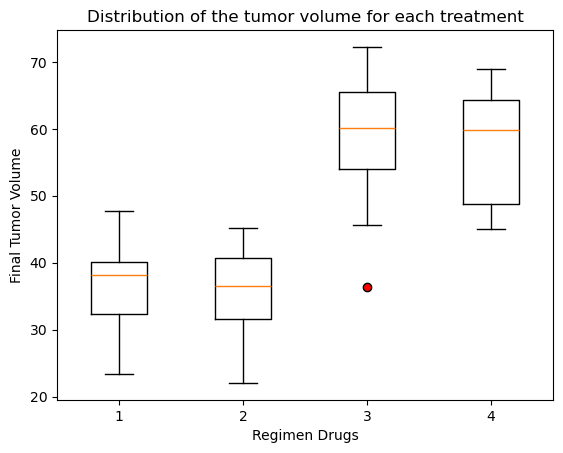

In [235]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markeredgecolor='black')
plt.boxplot(tumorvol_list, flierprops=flierprops)
plt.title("Distribution of the tumor volume for each treatment")
plt.xlabel("Regimen Drugs")
plt.ylabel("Final Tumor Volume")
plt.show()

#The generated boxes are for ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] respectively.

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin Treatment of Mouse w914'}, xlabel='Timepoint (Days)', ylabel='Tumor Volume (mm3)'>

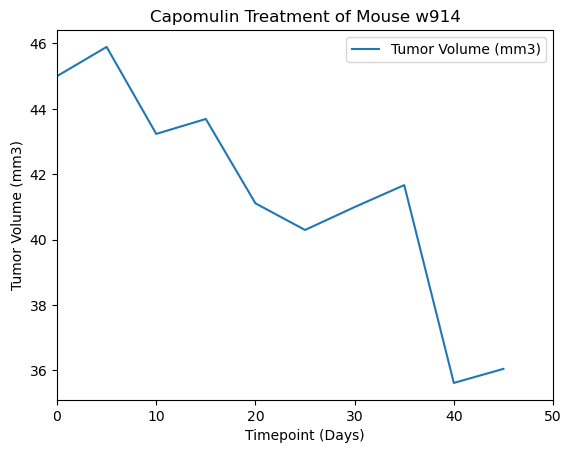

In [236]:

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomuli_testers = merged_clean_data[merged_clean_data["Drug Regimen"] == "Capomulin"]

#Getting the list of mice the were treated using Campomulin. Then, choosing one from the list
capomuli_testers["Mouse ID"].unique()

mouse_data_w914 = capomuli_testers.loc[capomuli_testers["Mouse ID"] == "w914"]

mouse_data_w914.plot(kind= "line", x="Timepoint", y="Tumor Volume (mm3)", xlim= (0, 50),
                    xlabel="Timepoint (Days)", ylabel= "Tumor Volume (mm3)", title= "Capomulin Treatment of Mouse w914")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

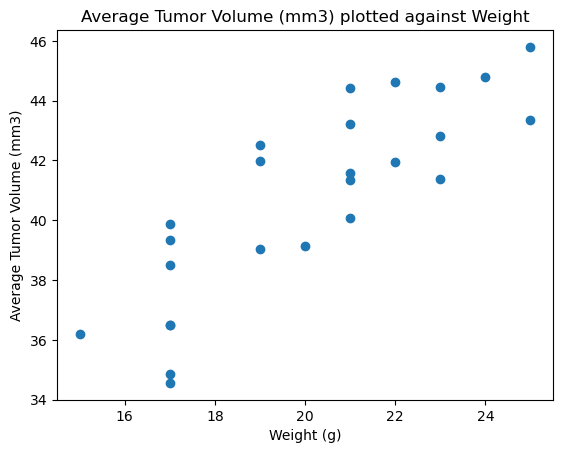

In [237]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Weight of each mice is kept constant. So mean function is called to get a series of just one weight per Mouse ID.
cap_mouse_weight = capomuli_testers.groupby("Mouse ID")["Weight (g)"].mean().rename("weight")
avg_tumor_vol = capomuli_testers.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().rename("average tumor vol")

plt.scatter(cap_mouse_weight, avg_tumor_vol)
plt.title("Average Tumor Volume (mm3) plotted against Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient between mouse weight and average observed tumor volume is 0.84
The strength of the correlation is 'strong'


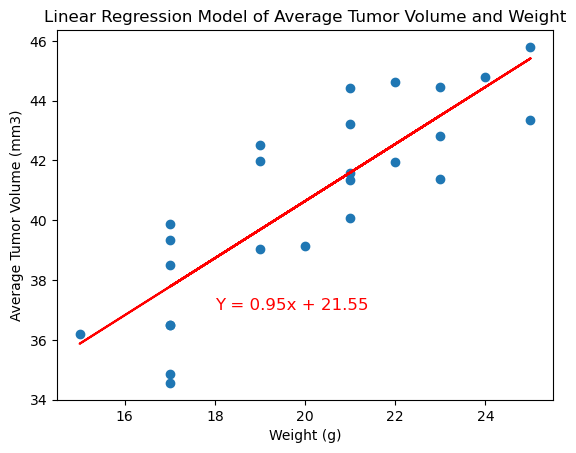

In [238]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#correlation:
correlation = round(st.pearsonr(cap_mouse_weight, avg_tumor_vol)[0],2)
print(f"The correlation coefficient between mouse weight and average observed tumor volume is {correlation}")
print(f"The strength of the correlation is 'strong'")

#Regression model (y= mx +c):
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_mouse_weight, avg_tumor_vol)
regress_tumor_values = (slope*cap_mouse_weight) + intercept

#Plotting scatter points
plt.scatter(cap_mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#plotting regression model
plt.plot(cap_mouse_weight, regress_tumor_values, 'r')
line_eq = "Y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))  #f"Y = {round(slope,2)}x + {round(intercept,2)}"
plt.title("Linear Regression Model of Average Tumor Volume and Weight")
plt.annotate(line_eq,(18, 37), fontsize= 12, color='r')
plt.show()

